## Week 3

## Review: matplolib subplots

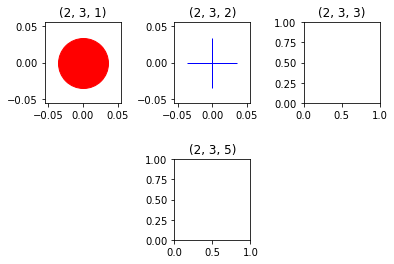

In [4]:
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace=0.7, wspace=0.7)

plt.subplot(2, 3, 1)
plt.title("(2, 3, 1)")
plt.plot(0, 0, 'ro', ms=50)

plt.subplot(2, 3, 2)
plt.title("(2, 3, 2)")
plt.plot(0, 0, 'b+', ms=50)

plt.subplot(2, 3, 3)
plt.title("(2, 3, 3)")

plt.subplot(2, 3, 5)
plt.title("(2, 3, 5)")


plt.show()

## Sidenote:  ipywidgets and interact

In [5]:
from ipywidgets import interact, fixed

In [6]:
def multiply(a, b):
    return a*b

interact(multiply, a=(1, 10), b=(1, 10));

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=5, description='b', …

In [7]:
interact(multiply, a=(1, 10), b=fixed(10));

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), Output()), _dom_classes=('widget-int…

In [8]:
import numpy as np


def f(n, color, sin, cos):
    x = np.linspace(0, 7, 1000)
    
    if sin:
        plt.plot(x, np.sin(n*x), '--', color=color)
    if cos:
        plt.plot(x, np.cos(n*x), color=color)
    plt.show()

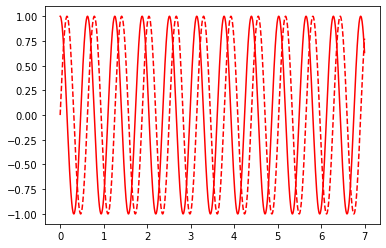

In [9]:
f(n=10, color='r', sin=True, cos=True)

In [10]:
interact(f, 
         n=(0., 10., 0.1),
         color={
             "red": 'r',
             "blue": 'b',
             "green": 'g',
             "black": 'k'
         },
         sin=True,
         cos=True
);

interactive(children=(FloatSlider(value=5.0, description='n', max=10.0), Dropdown(description='color', options…

## Types of machine learning:

* Supervised learning:
  * **Input:** training data with labels
  * **Goal:** predict labels for new, unlabeled data
  * **Main types:** classification and regression
  
* Unsupervised learning:
  * **Input:** unlabeled data.
  * **Goal:** Find patterns in the data, organize it, simplify it...
  * **Some types:** clustering, anomaly detection, density estimation, dimensionality reduction

## Clustering

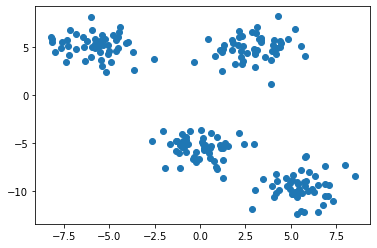

In [11]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=200,
                  n_features=2,
                  centers=4, 
                  cluster_std=1.3,
                  random_state=10
)

plt.scatter(X[:, 0], X[:, 1]);

* Centroid based clustering
* Centroid based clustering is not always the right type:

In [12]:
from sklearn.datasets import make_moons

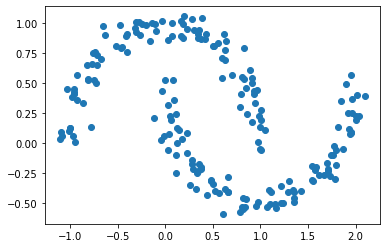

In [13]:
X, _ = make_moons(n_samples=200, noise=0.07)
plt.scatter(X[:, 0], X[:, 1]);

## k-Means

**Note:** With this algorithm we need to specify how many clusters we want to get.

* **Step 0** Select `k` data points as the initial cluster centroids
* **Step 1** Assign data points to clusters depending which centroid is the closest to each data point
* **Step 2** Compute new cluster centroids as the average of points in each cluster
* Repeat steps 1 and 2 until cluster centroid do not change anymore.

In [14]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def get_distances(X, Y):
    """
    Given 2-dimensional numpy arrays X and Y
    returns a 2-dimensional array whose (i, j)-entry
    is the square of the Euclidean distance between
    the i-th row of X and the j-th row of Y
    """

    return np.sum((X[:, np.newaxis, :] - Y[np.newaxis, :, :])**2, axis=-1)


def kmeans(X, n):
    """
    Implements the k-mneans algorithm.

    X:
        2-dimensional numpy array whose rows are coordinates of data points.
    n:
        Integer, the number of clusters.

    Returns:
        A list of tuples (labels, centers), one tuple for each iteration step.
        labels is a 1-dimensional array with labels od points in X, centers is
        a 2-dimensional array with coordinates of centroids of clusters.
        The last tuple on the list is the clustering final result.
    """

    X = X.copy()
    h = X.shape[0]
    centers = X[np.random.choice(h, size=n, replace=False)]

    new_centers = np.zeros_like(centers)

    steps = []
    while True:
        d = get_distances(X, centers)
        labels = np.argmin(d, axis=1)
        steps.append((labels, centers))
        for j in range(n):
            new_centers[j] = np.mean(X[labels == j], axis=0)
        if np.array_equal(centers, new_centers):
            break
        else:
            centers = new_centers.copy()
    return steps


def plot_clusters(X, labels=None, centers=None):
    """
    Plots clusters and their centoids.

    X:
        2-dimensional numpy array whose rows are coordinates of data points.
    labels:
        1-dimensional numpy array with labels of points in X.
    centers:
        2-dimensional numpy array whose rows are coordinates of cluster
        centroids.
    """

    if labels is not None:
        n = len(set(labels))
    else:
        n = 1
    colors = ListedColormap(
        ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple'][:n])
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, marker="+", cmap=colors)
    if centers is not None:
        plt.scatter(centers[:, 0],
                    centers[:, 1],
                    c=range(centers.shape[0]),
                    s=250,
                    linewidths=3,
                    edgecolors="k",
                    cmap=colors)
    plt.show()


def plot_iteration(X, steps, k=0):
    """
    Plots clusters computed by a given iteration of k-means.

    X:
        2-dimensional numpy array whose rows are coordinates of data points.
    steps:
        A list with cluster data produced by the kmeans function.
    k:
        An index of the steps list
    """

    plot_clusters(X, steps[k][0], steps[k][1])

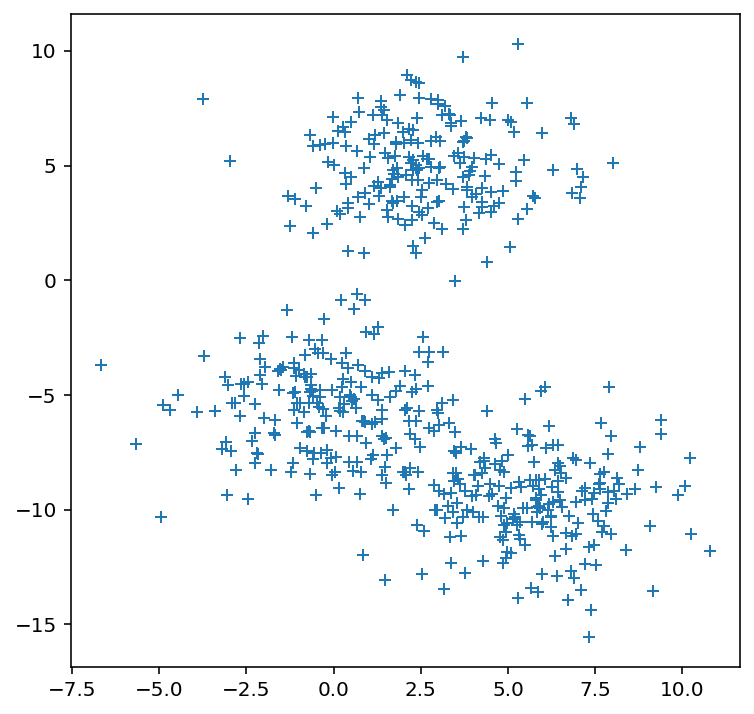

In [15]:
n = 3

X, y = make_blobs(n_samples=600,
                  n_features=2,
                  centers=3, 
                  cluster_std=2,
                  random_state=10
                 )
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0], X[:, 1], "+");

In [16]:
steps = kmeans(X, n)

In [17]:
steps[2]

(array([2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2,
        2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1,
        1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0,
        2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 1,
        2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0,
        0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0,
        1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2,
        0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0,
        0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2,
        2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1,
        2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0,
        0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2,
        1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 

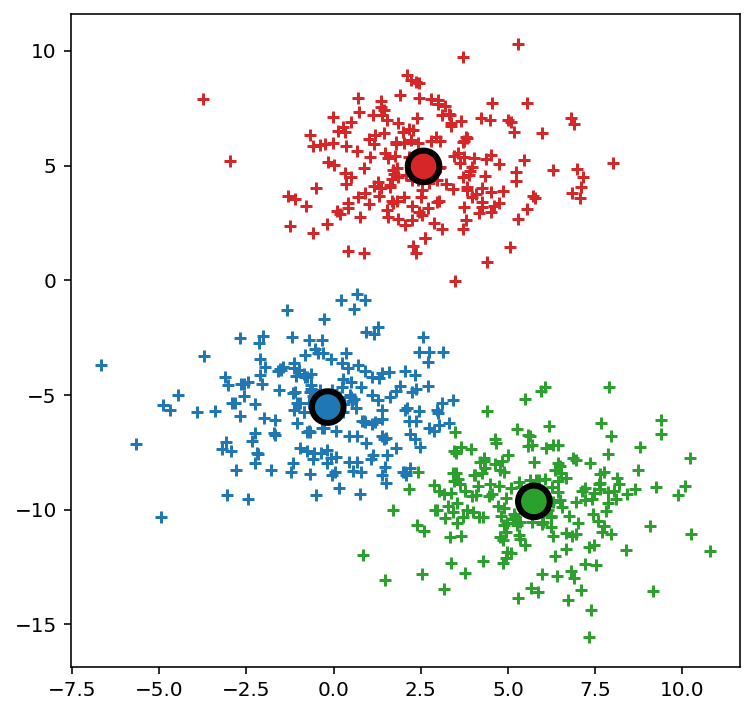

In [18]:
plot_iteration(X, steps, k=3)

In [19]:
interact(plot_iteration,
        X = fixed(X), 
        steps=fixed(steps),
        k=(0, len(steps)-1)
        );

interactive(children=(IntSlider(value=0, description='k', max=4), Output()), _dom_classes=('widget-interact',)…

In [20]:
moons, _ = make_moons(n_samples=400, noise=0.07)
steps = kmeans(moons, 2)

interact(plot_iteration,
        X = fixed(moons), 
        steps=fixed(steps),
        k=(0, len(steps)-1)
        );

interactive(children=(IntSlider(value=0, description='k', max=4), Output()), _dom_classes=('widget-interact',)…

## K-means with sklearn

In [21]:
from sklearn.cluster import KMeans

In [22]:
KMeans?

In [23]:
km = KMeans(n_clusters=3)

In [24]:
X, y = make_blobs(n_samples=600,
                  centers=3,
                  cluster_std=2,
                  random_state=10
)

X

array([[  6.24961769,  -9.00934014],
       [  4.95624841, -12.10661662],
       [  3.33614779, -11.18097865],
       ...,
       [  4.96651958, -11.8440634 ],
       [ -0.0815766 ,  -7.75275153],
       [  2.22743256,   6.09982258]])

In [25]:
y

array([0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0,
       1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1,

In [26]:
km.fit(X)

KMeans(n_clusters=3)

In [27]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 1,
       2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0,
       1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2,
       2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2,
       1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1,

In [28]:
km.cluster_centers_

array([[-0.18630907, -5.52019381],
       [ 2.57971185,  4.96332167],
       [ 5.73051427, -9.62182535]])

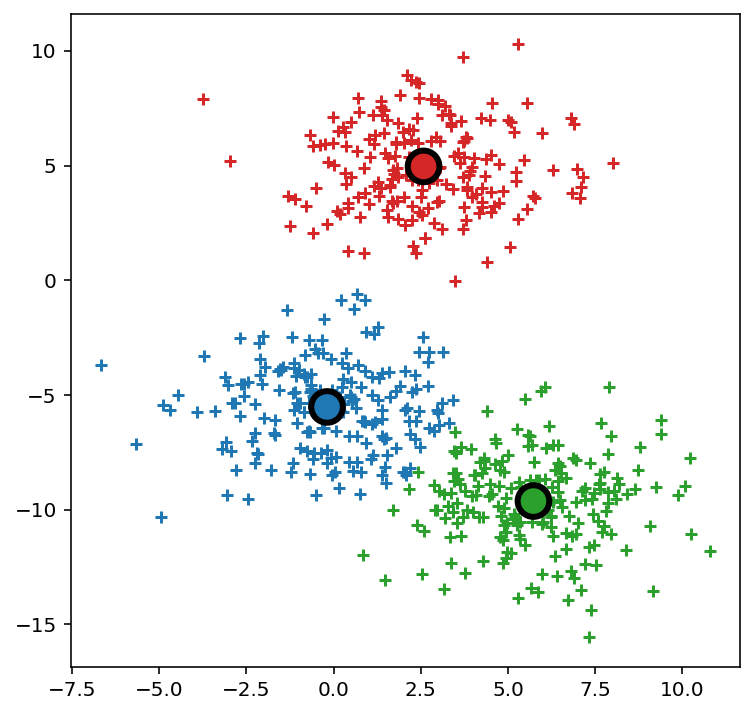

In [29]:
plot_clusters(X, km.labels_, km.cluster_centers_)

## k-NN with sklearn

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
X

array([[  6.24961769,  -9.00934014],
       [  4.95624841, -12.10661662],
       [  3.33614779, -11.18097865],
       ...,
       [  4.96651958, -11.8440634 ],
       [ -0.0815766 ,  -7.75275153],
       [  2.22743256,   6.09982258]])

In [33]:
y

array([0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0,
       1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1,

In [34]:
knn.fit(X, y)

KNeighborsClassifier()

In [35]:
p = [0, 1]
ap = np.array(p).reshape(1, -1)
ap

array([[0, 1]])

In [36]:
ap.shape

(1, 2)

In [37]:
p = [0, 1]
knn.predict(np.array(p).reshape(1, -1))[0]

1

In [38]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize


def plot_clusters(X, y, p=None, p_label=None, neighbors=None):
    """
    Plots nearest neighbors of a given point.

    X:
        A 2-dimensional numpy array with coordinates
        of points in clusters
    y:
        A 1-dimensional numpy array with labels of points
    p:
        An array with coordinates of the point whose
        neighbors will be plotted.
    p_label:
        The predicted label of the point p.
    neighbors:
        A list of row numbers of X which are the nearest
        neighbors of the point p.
    """

    # build a custom colormap
    col_list = ['dodgerblue', 'limegreen', 'red', 'orange', 'fuchsia']
    colors = ListedColormap(col_list)
    norm = Normalize(0, len(col_list))

    plt.figure(figsize=(8, 8))
    with plt.style.context('seaborn'):
        scatter = plt.scatter(X[:, 0],
                              X[:, 1],
                              c=y,
                              s=90,
                              cmap=colors,
                              norm=norm,
                              label=y)
        if p is not None:
            p_col = "k" if p_label is None else colors(norm(p_label))
            plt.plot(p[0], p[1], marker="*", mfc=p_col, mec="k", ms=30, mew=2)
        if neighbors is not None:
            plt.scatter(X[neighbors, 0],
                        X[neighbors, 1],
                        edgecolors='black',
                        linewidth=3,
                        facecolors="None",
                        s=300)
        plt.legend(*scatter.legend_elements(),
                   markerscale=1.5,
                   prop={
                       "size": 12,
                       "weight": "normal"
                   })
    plt.show()

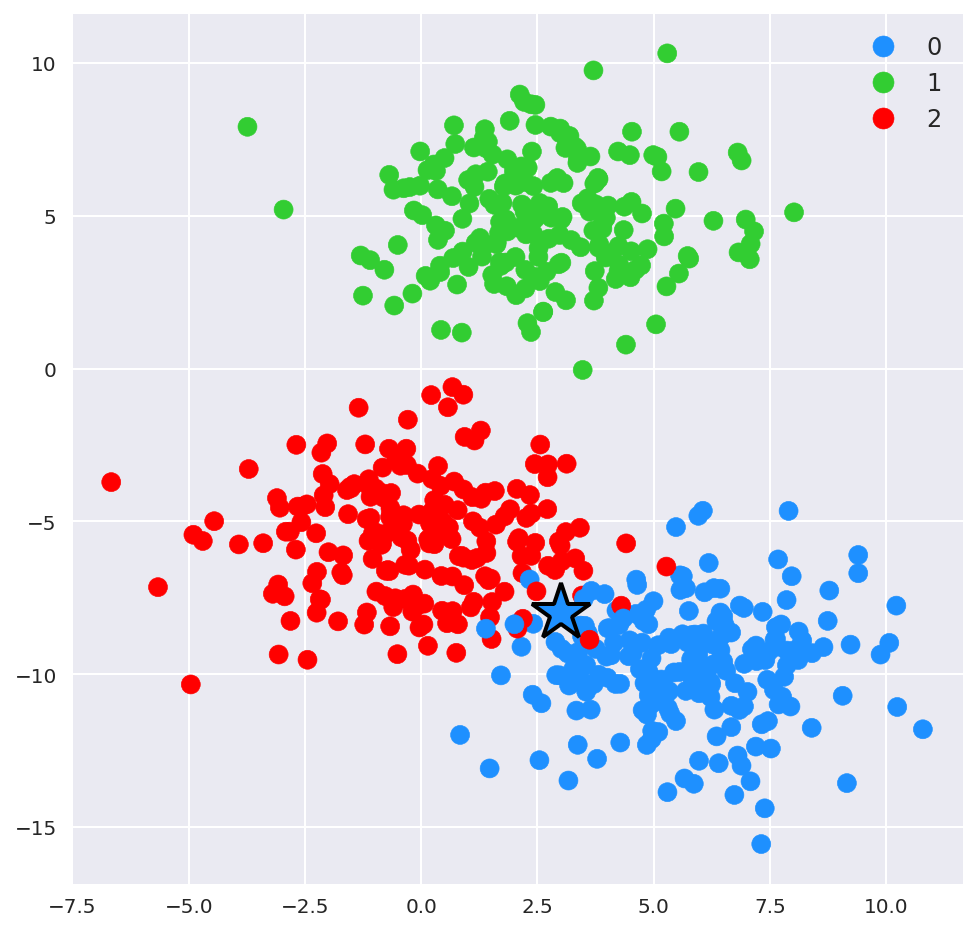

In [39]:
p = [3, -8]
label = knn.predict(np.array(p).reshape(1, -1))[0]
plot_clusters(X, y, p=p, p_label=label)

In [40]:
X, y = make_blobs(n_samples=600,
                  centers=4, 
                  cluster_std=3, 
                  random_state=100
                 )

N = 500

train_X = X[:N]
train_y = y[:N]

test_X = X[N:]
test_y = y[N:]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [41]:
predictions = knn.predict(test_X)
predictions

array([2, 3, 0, 2, 3, 3, 3, 1, 0, 1, 2, 0, 1, 3, 1, 2, 1, 1, 0, 1, 0, 2,
       1, 3, 0, 2, 3, 2, 0, 0, 1, 3, 2, 1, 1, 1, 1, 1, 3, 0, 1, 2, 3, 0,
       2, 0, 0, 0, 1, 0, 3, 1, 0, 1, 2, 0, 3, 0, 0, 0, 1, 3, 2, 3, 1, 1,
       3, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 3, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 3, 0, 2, 0, 3, 0, 1, 0])

In [42]:
test_y

array([2, 3, 0, 2, 1, 3, 1, 1, 0, 3, 2, 0, 1, 3, 3, 2, 1, 1, 0, 1, 0, 2,
       1, 1, 0, 2, 3, 2, 3, 0, 1, 3, 2, 1, 1, 1, 1, 3, 1, 0, 3, 2, 3, 0,
       2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 3, 0, 0, 0, 1, 3, 2, 3, 3, 3,
       3, 0, 1, 3, 2, 1, 3, 1, 0, 0, 2, 1, 3, 3, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 3, 0, 2, 0, 1, 0, 3, 0])

In [43]:
predictions == test_y

array([ True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True])

In [44]:
(predictions == test_y).sum()

82

In [45]:
accuracy = (predictions == test_y).sum()/len(test_y)
accuracy

0.82

In [46]:
for p in zip([1, 2, 3], ['a', 'b', 'c']):
    print(p)

(1, 'a')
(2, 'b')
(3, 'c')


In [47]:
confusion = np.zeros((4, 4), dtype=int)
confusion

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [48]:
for p in zip(test_y, predictions):
    confusion[p[0], p[1]] += 1

In [49]:
confusion

array([[27,  1,  0,  0],
       [ 0, 25,  0,  6],
       [ 0,  0, 18,  0],
       [ 3,  8,  0, 12]])

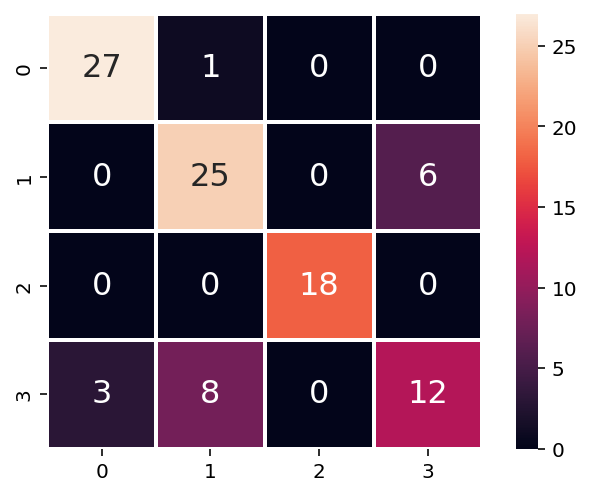

In [50]:
import seaborn as sns

sns.heatmap(confusion,
            annot=True,
            annot_kws={"fontsize": 16},
            linewidth=2, 
            square=True
           );

## Clustering colors

In [51]:
rng = np.random.default_rng(0)

a = rng.integers(0, 100, (4, 4))
a

array([[85, 63, 51, 26],
       [30,  4,  7,  1],
       [17, 81, 64, 91],
       [50, 60, 97, 72]])

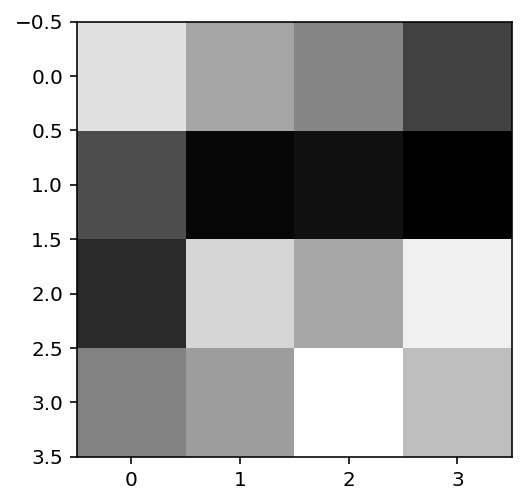

In [52]:
plt.imshow(a, cmap="gray");

In [53]:
a = rng.integers(0, 255, (4, 4, 3))
a

array([[[161, 138, 142],
        [238,  70, 208],
        [171,   0, 100],
        [218, 141,   8]],

       [[195, 186, 215],
        [ 44,  22, 220],
        [  5, 138,  20],
        [ 76, 122, 107]],

       [[102,   7,   1],
        [ 31,   2, 171],
        [134, 165,  65],
        [156, 194,  97]],

       [[117, 254, 205],
        [250,  96, 174],
        [242, 165, 214],
        [175, 179,  99]]])

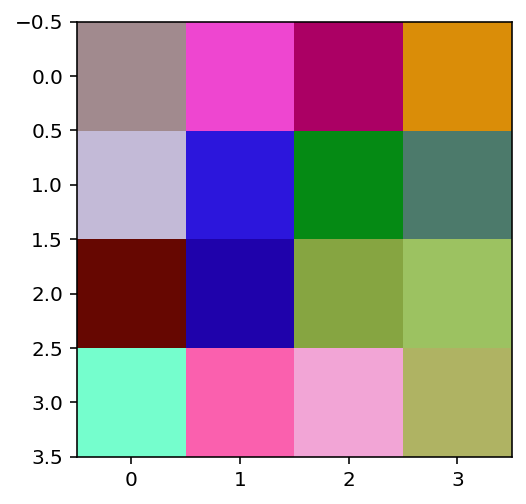

In [54]:
plt.imshow(a);

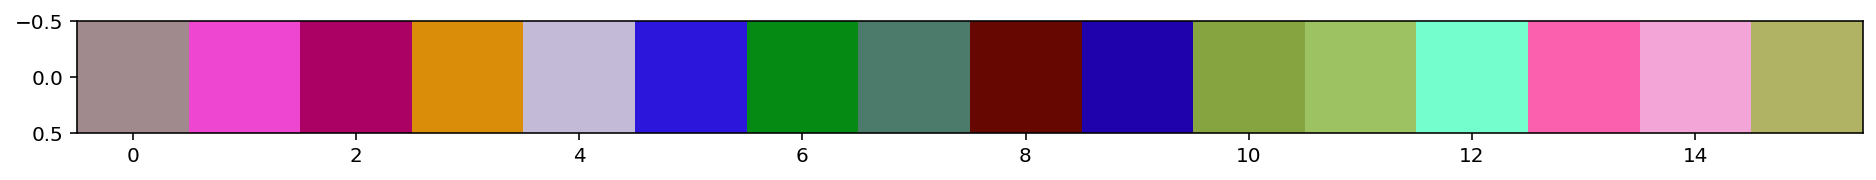

In [55]:
plt.figure(figsize=(16, 16))
plt.imshow(a.astype(int).reshape(1, -1, 3));

In [57]:
tiger = plt.imread("tiger.jpg")
tiger

array([[[243, 224, 194],
        [242, 223, 193],
        [236, 217, 187],
        ...,
        [241, 218, 184],
        [245, 222, 188],
        [250, 227, 193]],

       [[246, 229, 199],
        [246, 229, 199],
        [241, 224, 194],
        ...,
        [247, 224, 190],
        [252, 229, 195],
        [252, 229, 195]],

       [[249, 232, 204],
        [251, 234, 206],
        [249, 232, 204],
        ...,
        [253, 230, 198],
        [255, 233, 201],
        [248, 225, 193]],

       ...,

       [[254, 251, 244],
        [254, 251, 244],
        [254, 251, 244],
        ...,
        [254, 247, 237],
        [254, 247, 237],
        [254, 247, 237]],

       [[254, 251, 244],
        [254, 251, 244],
        [254, 251, 244],
        ...,
        [254, 247, 237],
        [254, 247, 237],
        [254, 247, 237]],

       [[254, 251, 244],
        [254, 251, 244],
        [254, 251, 244],
        ...,
        [254, 247, 237],
        [254, 247, 237],
        [254, 247, 237]]

In [58]:
tiger.shape

(644, 1000, 3)

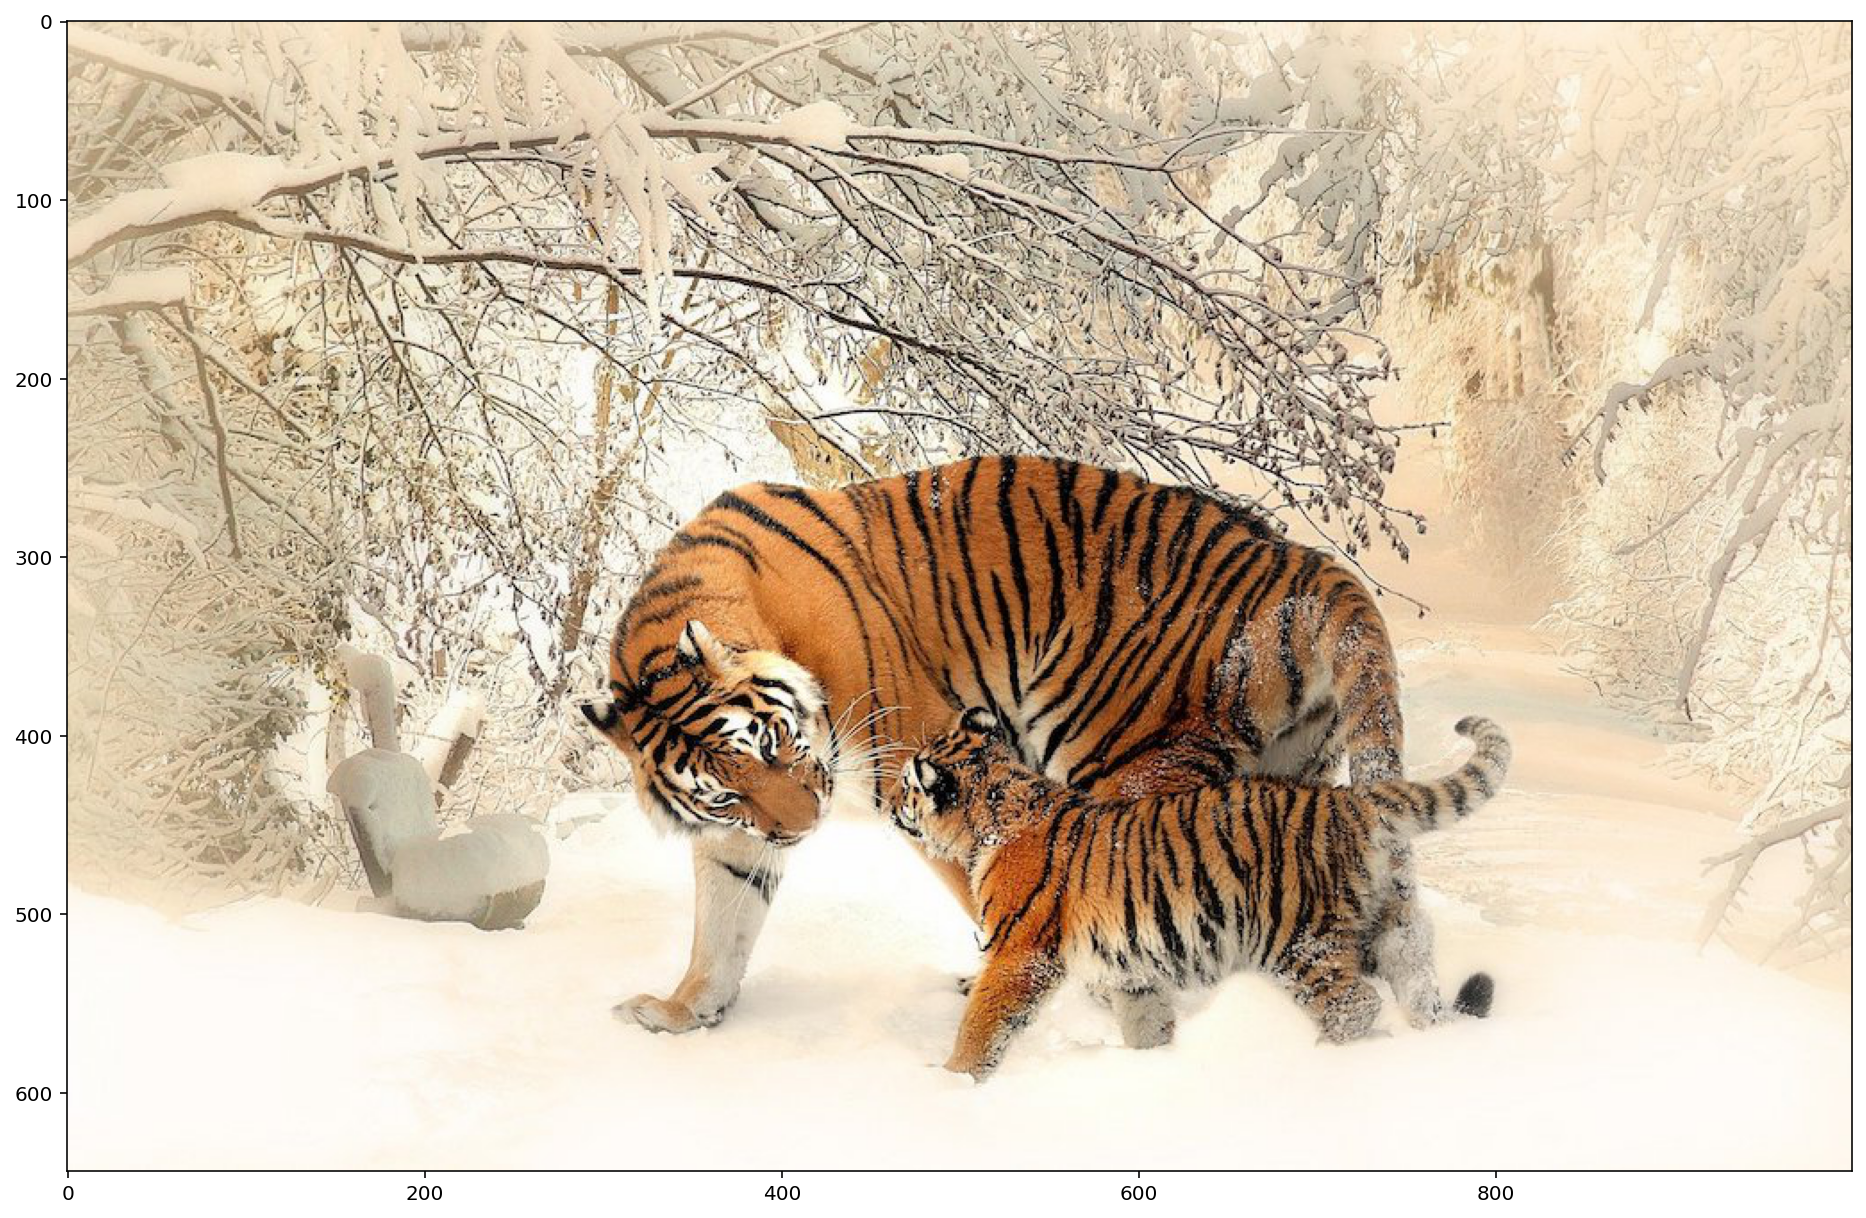

In [59]:
plt.figure(figsize=(16, 16))
plt.imshow(tiger);

In [60]:
pixels = tiger.reshape(-1, 3)
pixels

array([[243, 224, 194],
       [242, 223, 193],
       [236, 217, 187],
       ...,
       [254, 247, 237],
       [254, 247, 237],
       [254, 247, 237]], dtype=uint8)

In [61]:
pixels.shape

(644000, 3)

In [62]:
import numpy as np

np.unique(pixels, axis=0).shape

(85796, 3)